# Performing Data Analysis and Predictive Modeling

In [2]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import mutual_info_classif
from sklearn.svm import SVC
#from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [3]:
# reading training and testing csv
df=pd.read_csv("train.csv")
df2=pd.read_csv("test.csv")

## Understanding of Data 

In [5]:
df

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.00,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.00,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.00,0,0,0,1,13,159,98,0
3,1,0.00,1,0.00,0,82,0,0,679,414,651,0
4,1,0.00,2,0.00,0,0,0,1,6,151,126,0
...,...,...,...,...,...,...,...,...,...,...,...,...
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1


In [6]:
#Projecting shape of the data
print("Shape of df:",df.shape)
print("Shape of df2:",df2.shape)

Shape of df: (576, 12)
Shape of df2: (120, 12)


In [7]:
#Printing first 5 rows of df
df.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.27,0,0.0,0,53,0,0,32,1000,955,0
1,1,0.00,2,0.0,0,44,0,0,286,2740,533,0
2,1,0.10,2,0.0,0,0,0,1,13,159,98,0
3,1,0.00,1,0.0,0,82,0,0,679,414,651,0
4,1,0.00,2,0.0,0,0,0,1,6,151,126,0


In [8]:
#Printing first 5 rows of df2
df2.head()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
0,1,0.33,1,0.33,1,30,0,1,35,488,604,0
1,1,0.00,5,0.00,0,64,0,1,3,35,6,0
2,1,0.00,2,0.00,0,82,0,1,319,328,668,0
3,1,0.00,1,0.00,0,143,0,1,273,14890,7369,0
4,1,0.50,1,0.00,0,76,0,1,6,225,356,0


In [9]:
#Printing last 5 rows of df
df.tail()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
571,1,0.55,1,0.44,0,0,0,0,33,166,596,1
572,1,0.38,1,0.33,0,21,0,0,44,66,75,1
573,1,0.57,2,0.00,0,0,0,0,4,96,339,1
574,1,0.57,1,0.00,0,11,0,0,0,57,73,1
575,1,0.27,1,0.00,0,0,0,0,2,150,487,1


In [10]:
#Printing last 5 rows of df2
df2.tail()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
115,1,0.29,1,0.0,0,0,0,0,13,114,811,1
116,1,0.40,1,0.0,0,0,0,0,4,150,164,1
117,1,0.00,2,0.0,0,0,0,0,3,833,3572,1
118,0,0.17,1,0.0,0,0,0,0,1,219,1695,1
119,1,0.44,1,0.0,0,0,0,0,3,39,68,1


In [11]:
# checking structural information of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           576 non-null    int64  
 1   nums/length username  576 non-null    float64
 2   fullname words        576 non-null    int64  
 3   nums/length fullname  576 non-null    float64
 4   name==username        576 non-null    int64  
 5   description length    576 non-null    int64  
 6   external URL          576 non-null    int64  
 7   private               576 non-null    int64  
 8   #posts                576 non-null    int64  
 9   #followers            576 non-null    int64  
 10  #follows              576 non-null    int64  
 11  fake                  576 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 54.1 KB


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   profile pic           120 non-null    int64  
 1   nums/length username  120 non-null    float64
 2   fullname words        120 non-null    int64  
 3   nums/length fullname  120 non-null    float64
 4   name==username        120 non-null    int64  
 5   description length    120 non-null    int64  
 6   external URL          120 non-null    int64  
 7   private               120 non-null    int64  
 8   #posts                120 non-null    int64  
 9   #followers            120 non-null    int64  
 10  #follows              120 non-null    int64  
 11  fake                  120 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 11.4 KB


In [13]:
# checking statistical info of the dataset
df.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,576.000000,576.000000
mean,0.701389,0.163837,1.460069,0.036094,0.034722,22.623264,0.116319,0.381944,107.489583,8.530724e+04,508.381944,0.500000
std,0.458047,0.214096,1.052601,0.125121,0.183234,37.702987,0.320886,0.486285,402.034431,9.101485e+05,917.981239,0.500435
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.900000e+01,57.500000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,1.505000e+02,229.500000,0.500000
75%,1.000000,0.310000,2.000000,0.000000,0.000000,34.000000,0.000000,1.000000,81.500000,7.160000e+02,589.500000,1.000000
max,1.000000,0.920000,12.000000,1.000000,1.000000,150.000000,1.000000,1.000000,7389.000000,1.533854e+07,7500.000000,1.000000


In [14]:
df2.describe()

,profile pic,nums/length username,fullname words,nums/length fullname,name==username,description length,external URL,private,#posts,#followers,#follows,fake
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000
mean,0.758333,0.179917,1.550000,0.071333,0.041667,27.200000,0.100000,0.308333,82.866667,4.959472e+04,779.266667,0.500000
std,0.429888,0.241492,1.187116,0.209429,0.200664,42.588632,0.301258,0.463741,230.468136,3.816126e+05,1409.383558,0.502096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.725000e+01,119.250000,0.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2.165000e+02,354.500000,0.500000
75%,1.000000,0.330000,2.000000,0.000000,0.000000,45.250000,0.000000,1.000000,58.250000,5.932500e+02,668.250000,1.000000
max,1.000000,0.890000,9.000000,1.000000,1.000000,149.000000,1.000000,1.000000,1879.000000,4.021842e+06,7453.000000,1.000000


In [15]:
#Checking for null values
df.isnull().sum()

profile pic             0
nums/length username    0
fullname words          0
nums/length fullname    0
name==username          0
description length      0
external URL            0
private                 0
#posts                  0
#followers              0
#follows                0
fake                    0
dtype: int64

In [16]:
# checking duplicated rows in df
df.duplicated().sum()
df2.duplicated().sum()

2

## Data Preprocessing

### Data Cleaning 

In [19]:
# Removing duplicated rows
df = df.drop_duplicates().reset_index(drop=True)
df2 = df2.drop_duplicates().reset_index(drop=True)

In [20]:
# checking duplicated rows after deletion
df.duplicated().sum()
df2.duplicated().sum()

0

#### Removing Outliers 

In [22]:
# Removing Outliers from Followers, Follows, Posts
num_columns = ["#followers", "#follows", "#posts"]  
def remove_outliers_iqr(df, columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    # Define outlier boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter the dataset
    df_cleaned = df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]
    return df_cleaned
# Remove outliers
df = remove_outliers_iqr(df, num_columns)
df2 = remove_outliers_iqr(df2, num_columns)
print(f"Original Train Size: {df.shape}, After Outlier Removal: {df.shape}")
print(f"Original Test Size: {df2.shape}, After Outlier Removal: {df2.shape}")

Original Train Size: (444, 12), After Outlier Removal: (444, 12)
Original Test Size: (89, 12), After Outlier Removal: (89, 12)


# Data Visualization

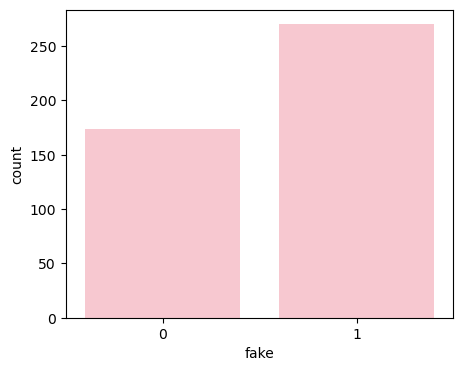

In [104]:
# Checking for data imbalancing in target column
plt.figure(figsize=(5, 4))  # Set figure size
sns.countplot(x=df["fake"], color="pink")  # Create count plot
plt.show()

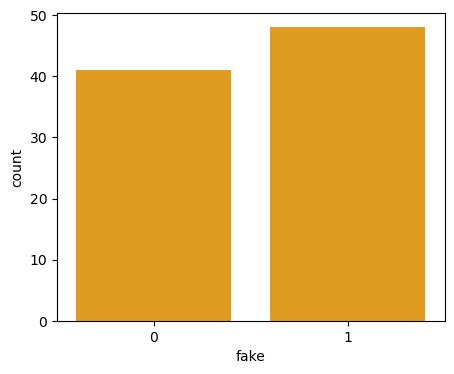

In [106]:
# Checking for data imbalancing in the target column in df2
plt.figure(figsize=(5, 4))
sns.countplot(x=df2["fake"], color="orange")
plt.show()

#### Checking skewness

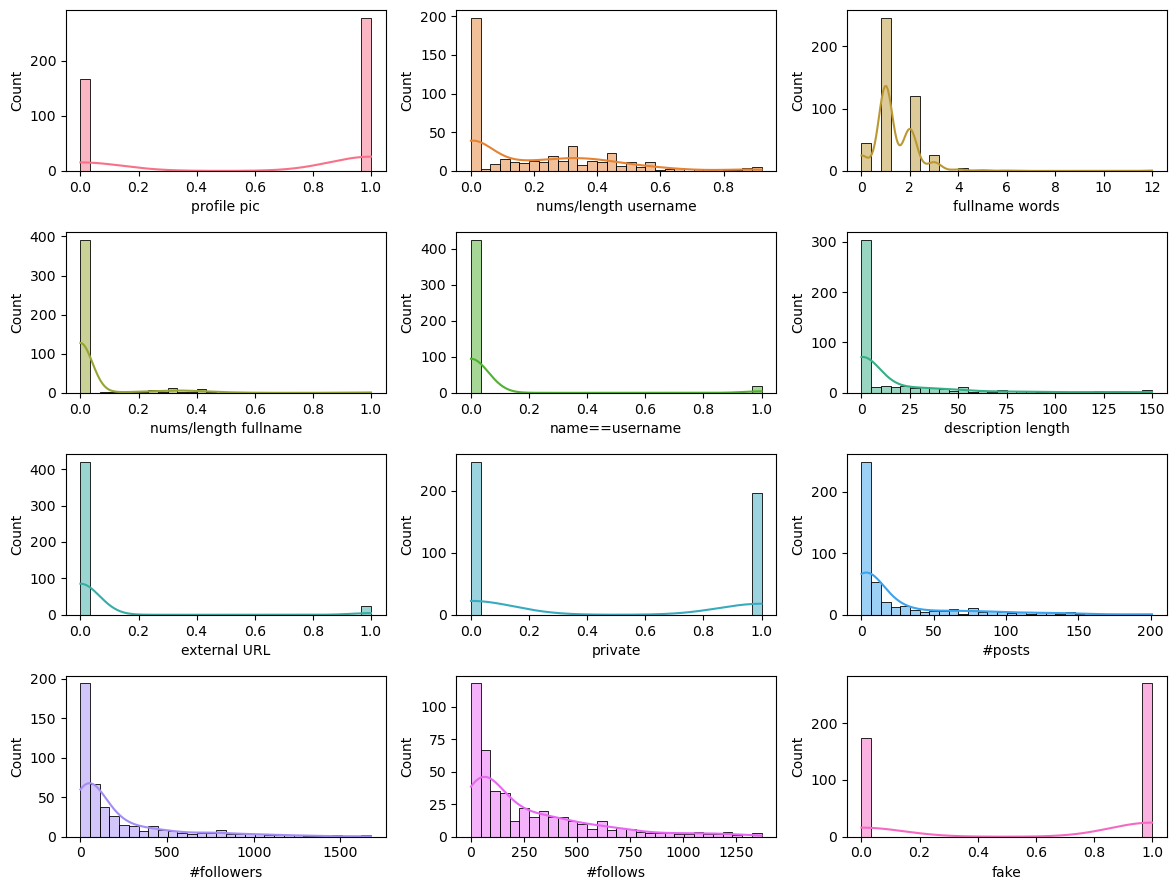

In [27]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 9))  
axes = axes.flatten()  
colors = sns.color_palette("husl", len(axes))  # Generate a color palette

for i, (column, color) in enumerate(zip(df.select_dtypes(include=['number']).columns, colors)):
    sns.histplot(df[column], bins=30, kde=True, ax=axes[i], color=color)
plt.tight_layout()
plt.show()

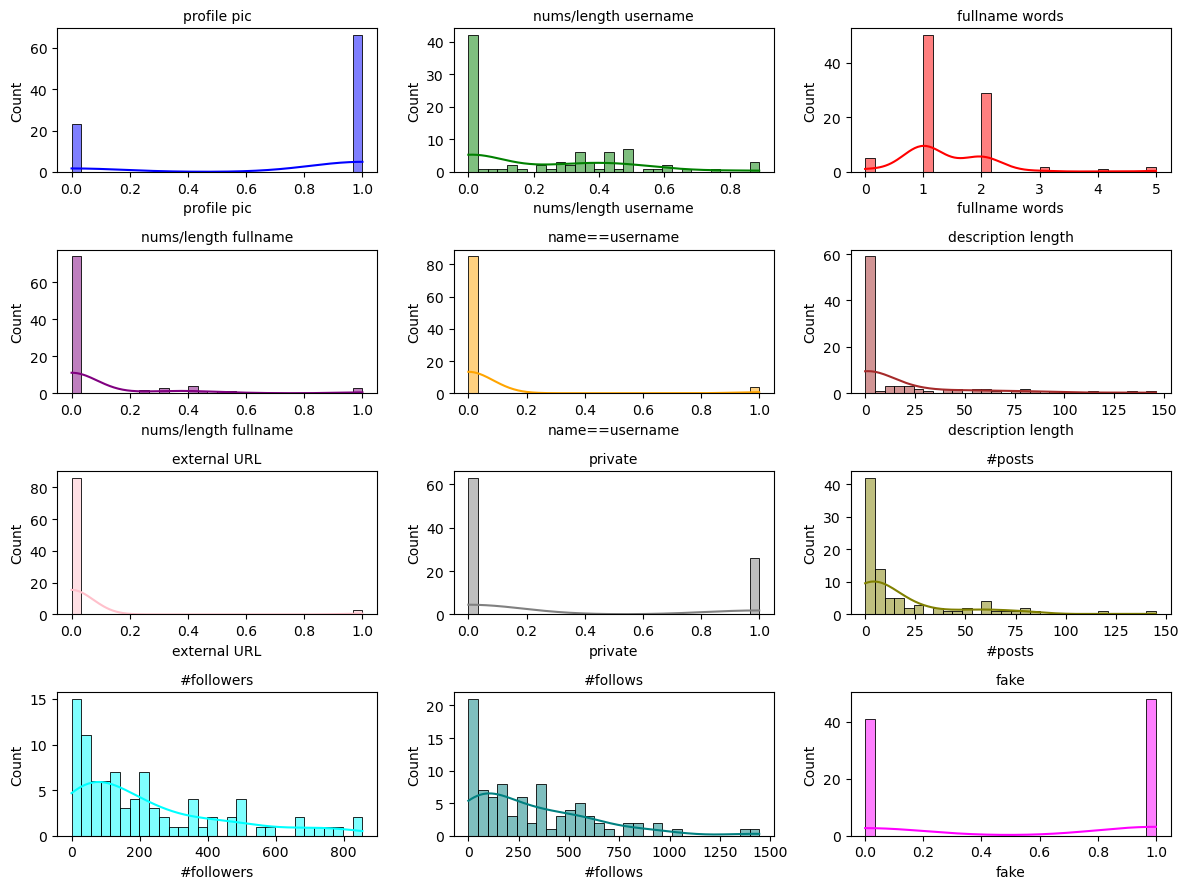

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

colors = ["blue", "green", "red", "purple", "orange", "brown", 
          "pink", "gray", "olive", "cyan", "teal", "magenta"]

fig, axes = plt.subplots(4, 3, figsize=(12, 9))
axes = axes.flatten()

for ax, col, color in zip(axes, df2.select_dtypes(include="number"), colors):
    sns.histplot(df2[col], bins=30, kde=True, ax=ax, color=color)
    ax.set_title(col, fontsize=10)

plt.tight_layout()
plt.show()

#### Checking Outliers

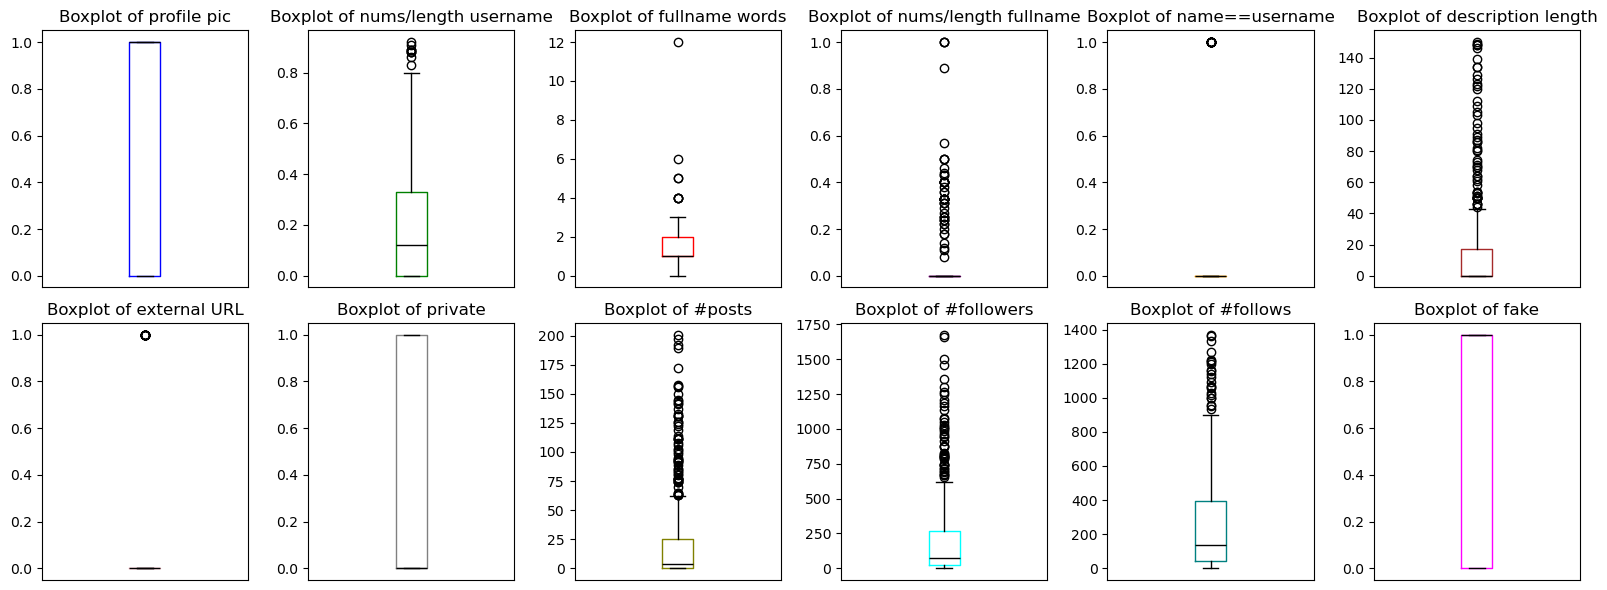

In [30]:
#Displaying boxplot for checking outliers in df
cols_per_row = 6
num_cols = len(df.columns)
num_rows = int(np.ceil(num_cols / cols_per_row)) 
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(16, 3 * num_rows))
axes = axes.flatten()
colors = ["blue", "green", "red", "purple", "orange", "brown", 
          "pink", "gray", "olive", "cyan", "teal", "magenta"]
for ax, col, color in zip(axes, df.columns, colors * (num_cols // len(colors) + 1)):
    ax.boxplot(df[col], boxprops=dict(color=color), medianprops=dict(color="black"))
    ax.set_title(f"Boxplot of {col}")
    ax.set_xticks([])
# Remove unused subplots
for j in range(num_cols, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

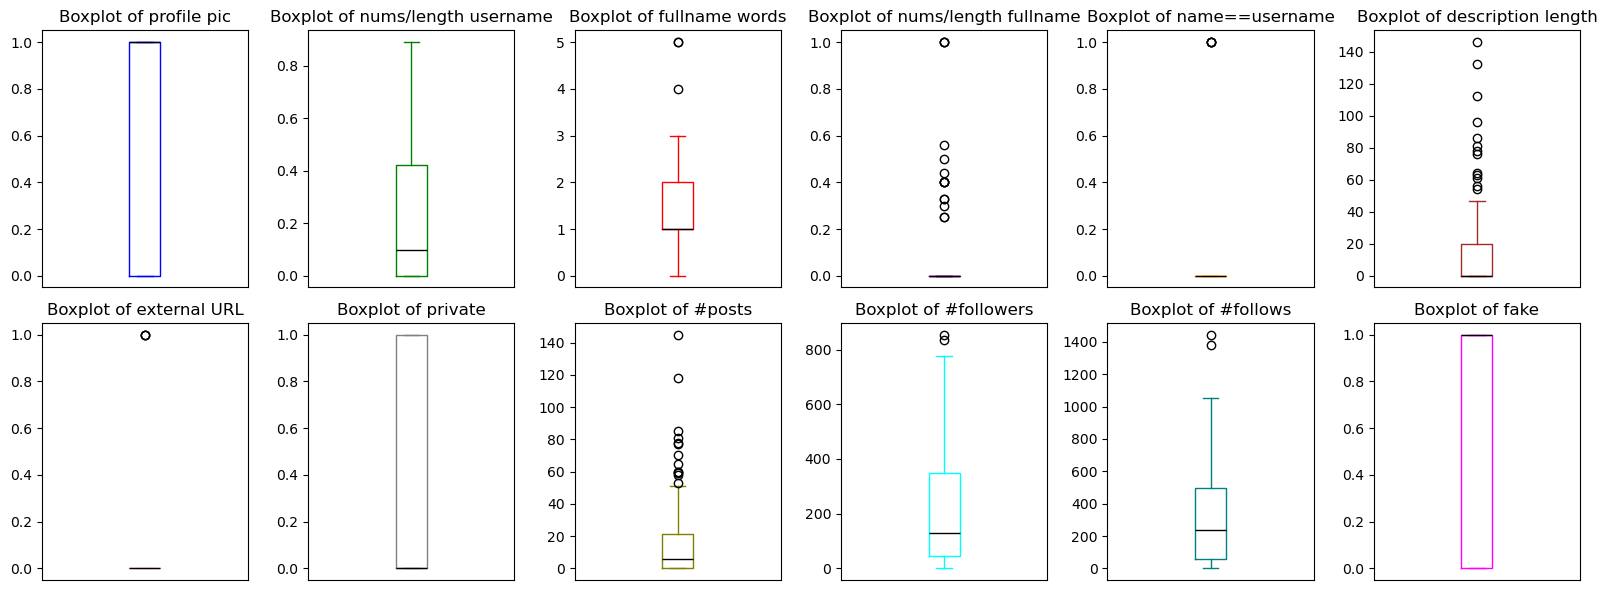

In [31]:
#Displaying boxplot for checking outliers in df2
cols_per_row = 6
num_cols = len(df2.columns)
num_rows = int(np.ceil(num_cols / cols_per_row))  
fig, axes = plt.subplots(num_rows, cols_per_row, figsize=(16, 3 * num_rows))
axes = axes.flatten()
colors = ["blue", "green", "red", "purple", "orange", "brown", 
          "pink", "gray", "olive", "cyan", "teal", "magenta"] * (num_cols // 12 + 1)
for ax, col, color in zip(axes[:num_cols], df2.columns, colors):
    ax.boxplot(df2[col], boxprops={"color": color}, medianprops={"color": "black"}, 
               whiskerprops={"color": color}, capprops={"color": color})
    ax.set_title(f"Boxplot of {col}")
    ax.set_xticks([])
for ax in axes[num_cols:]:  
    fig.delaxes(ax)  
plt.tight_layout()
plt.show()

#### Normalizing and Standardizing of Data  

In [33]:
# Apply log transformation
cols_to_transform = ['#followers', '#follows', '#posts', 'description length']
for col in cols_to_transform:
    df[col] = np.log1p(df[col]) 

In [34]:
# Apply log transformation in df2
cols_to_transform = ['#followers', '#follows', '#posts', 'description length']
for col in cols_to_transform:
    df2[col] = np.log1p(df2[col]) 

In [35]:
# Apply Standard Scaler to standardize the data
scaler = StandardScaler()
num_features = ['nums/length username', 'nums/length fullname', 'description length', '#posts', '#followers', '#follows']
df[num_features] = scaler.fit_transform(df[num_features])

In [36]:
# Apply Standard Scaler to standardize the data in df2
scaler = StandardScaler()
num_features = ['nums/length username', 'nums/length fullname', 'description length', '#posts', '#followers', '#follows']
df2[num_features] = scaler.fit_transform(df2[num_features])

#### Visualization after log transformation 

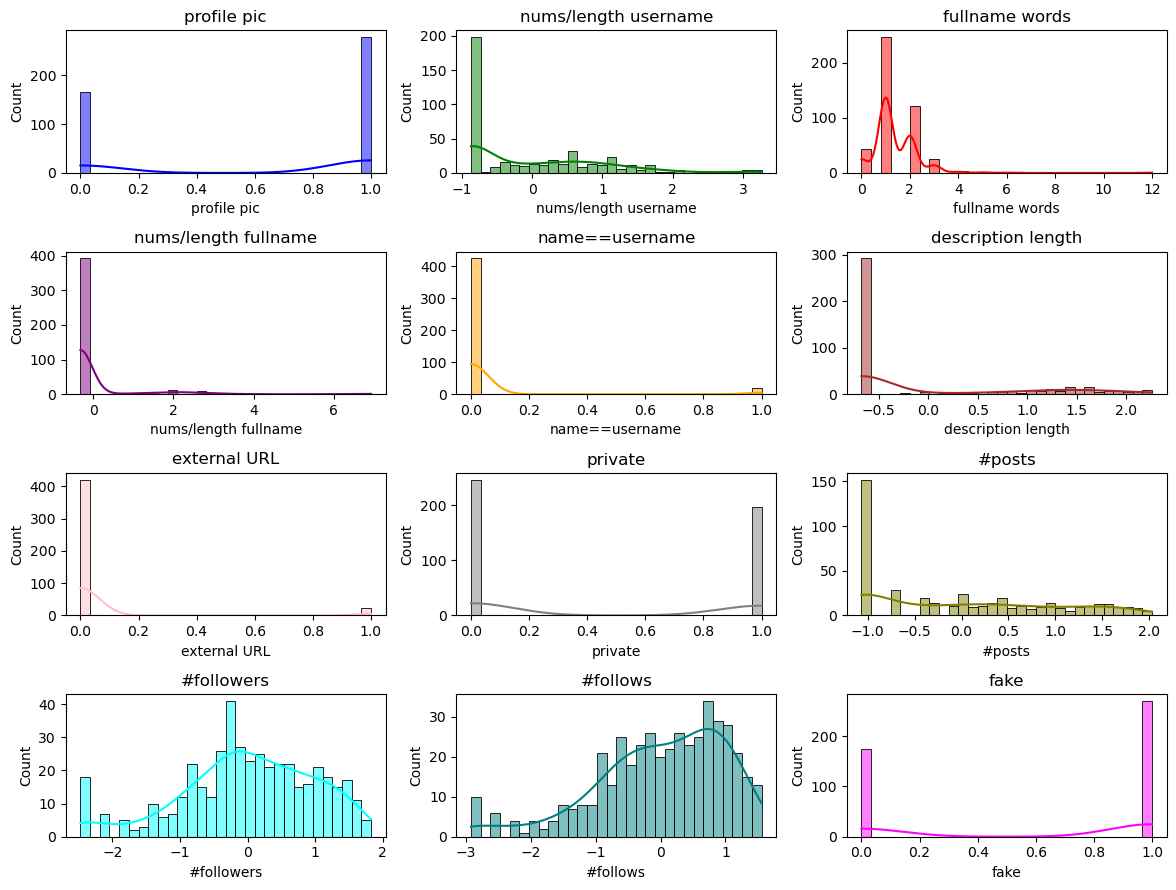

In [38]:
#Display histplot with kde for checking data distribution after log transformation and data scaling
fig, axes = plt.subplots(4, 3, figsize=(12, 9))
axes = axes.flatten()
colors = ["blue", "green", "red", "purple", "orange", "brown", 
          "pink", "gray", "olive", "cyan", "teal", "magenta"]  
for ax, col, color in zip(axes[:len(df.select_dtypes(include='number').columns)], 
                          df.select_dtypes(include='number').columns, colors):
    sns.histplot(df[col], bins=30, kde=True, ax=ax, color=color)
    ax.set_title(col)
plt.tight_layout()
plt.show()

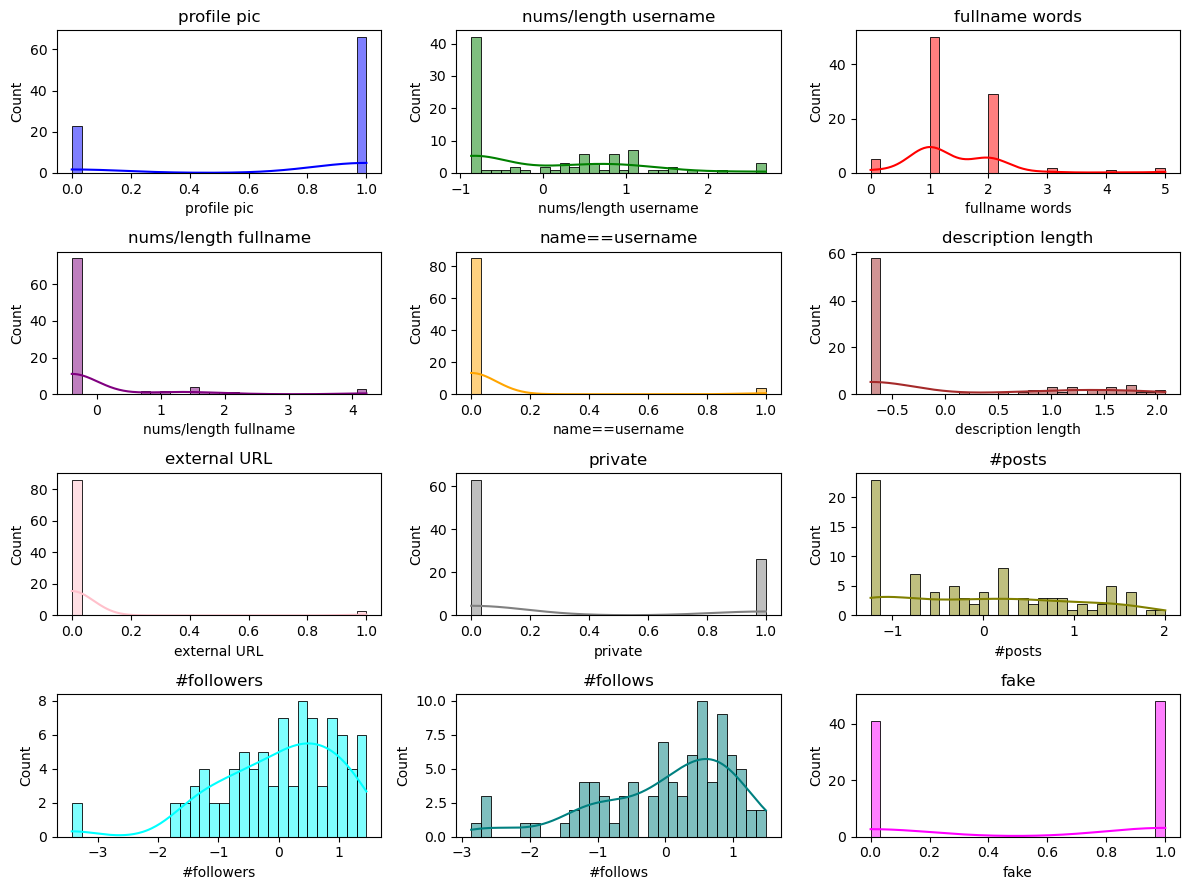

In [39]:
fig, axes = plt.subplots(4, 3, figsize=(12, 9))
axes = axes.flatten()
colors = ["blue", "green", "red", "purple", "orange", "brown", 
          "pink", "gray", "olive", "cyan", "teal", "magenta"]  
for ax, col, color in zip(axes[:len(df2.select_dtypes(include='number').columns)], 
                          df2.select_dtypes(include='number').columns, colors):
    sns.histplot(df2[col], bins=30, kde=True, ax=ax, color=color)
    ax.set_title(col)
plt.tight_layout()
plt.show()

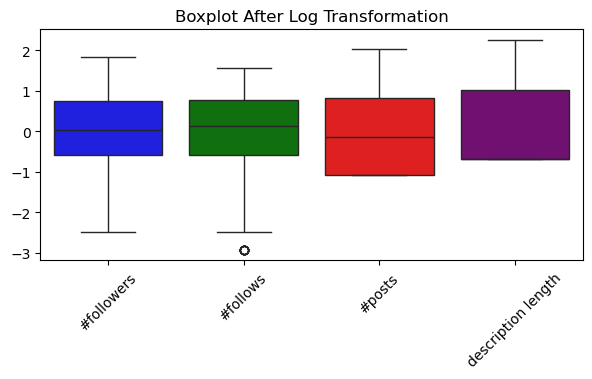

In [40]:
#Displaying boxplot for checking outliers after log transformation and data scaling
plt.figure(figsize=(7, 3))

colors = ["blue", "green", "red", "purple", "orange", "brown", 
          "pink", "gray", "olive", "cyan", "teal", "magenta"]  

sns.boxplot(data=df[cols_to_transform], palette=colors[:len(cols_to_transform)])

plt.xticks(rotation=45)
plt.title("Boxplot After Log Transformation")
plt.show()

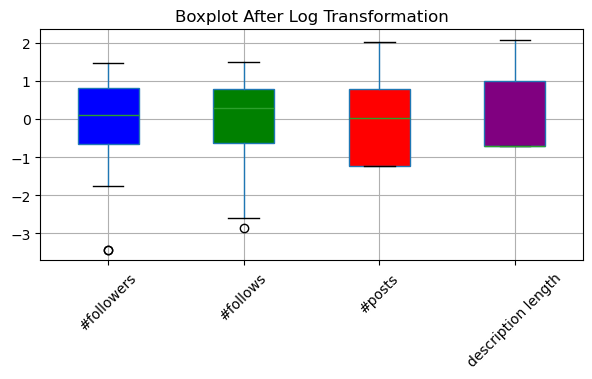

In [41]:
#Displaying boxplot for checking outliers after log transformation and data scaling in df2
plt.figure(figsize=(7, 3))
box = df2[cols_to_transform].boxplot(return_type="dict", patch_artist=True, rot=45)
colors = ["blue", "green", "red", "purple", "orange", "brown", 
          "pink", "gray", "olive", "cyan", "teal", "magenta"]
for patch, color in zip(box["boxes"], colors * (len(box["boxes"]) // len(colors) + 1)):
    patch.set_facecolor(color)
plt.title("Boxplot After Log Transformation")
plt.show()

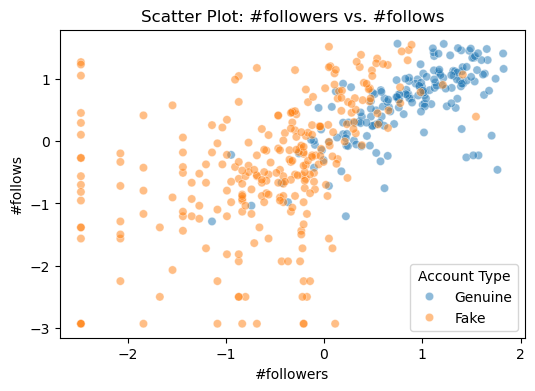

In [42]:
# plotting scatter plot to analye relationship between followers and follows
plt.figure(figsize=(6, 4))
scatter = sns.scatterplot(x=df["#followers"], y=df["#follows"], hue=df["fake"], alpha=0.5)
# Rename hue labels (assuming 0 = Genuine, 1 = Fake)
handles, labels = scatter.get_legend_handles_labels()
plt.legend(handles, ["Genuine", "Fake"], title="Account Type")
plt.title("Scatter Plot: #followers vs. #follows")
plt.xlabel("#followers")
plt.ylabel("#follows")
plt.show()

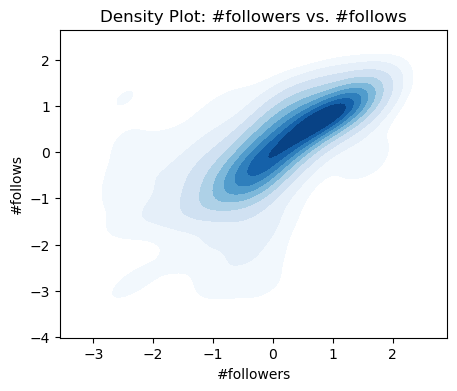

In [43]:
#Density plot to see density relation between followers and follows
plt.figure(figsize=(5, 4))
sns.kdeplot(data=df, x="#followers", y="#follows", cmap="Blues", fill=True)
plt.title("Density Plot: #followers vs. #follows")
plt.show()

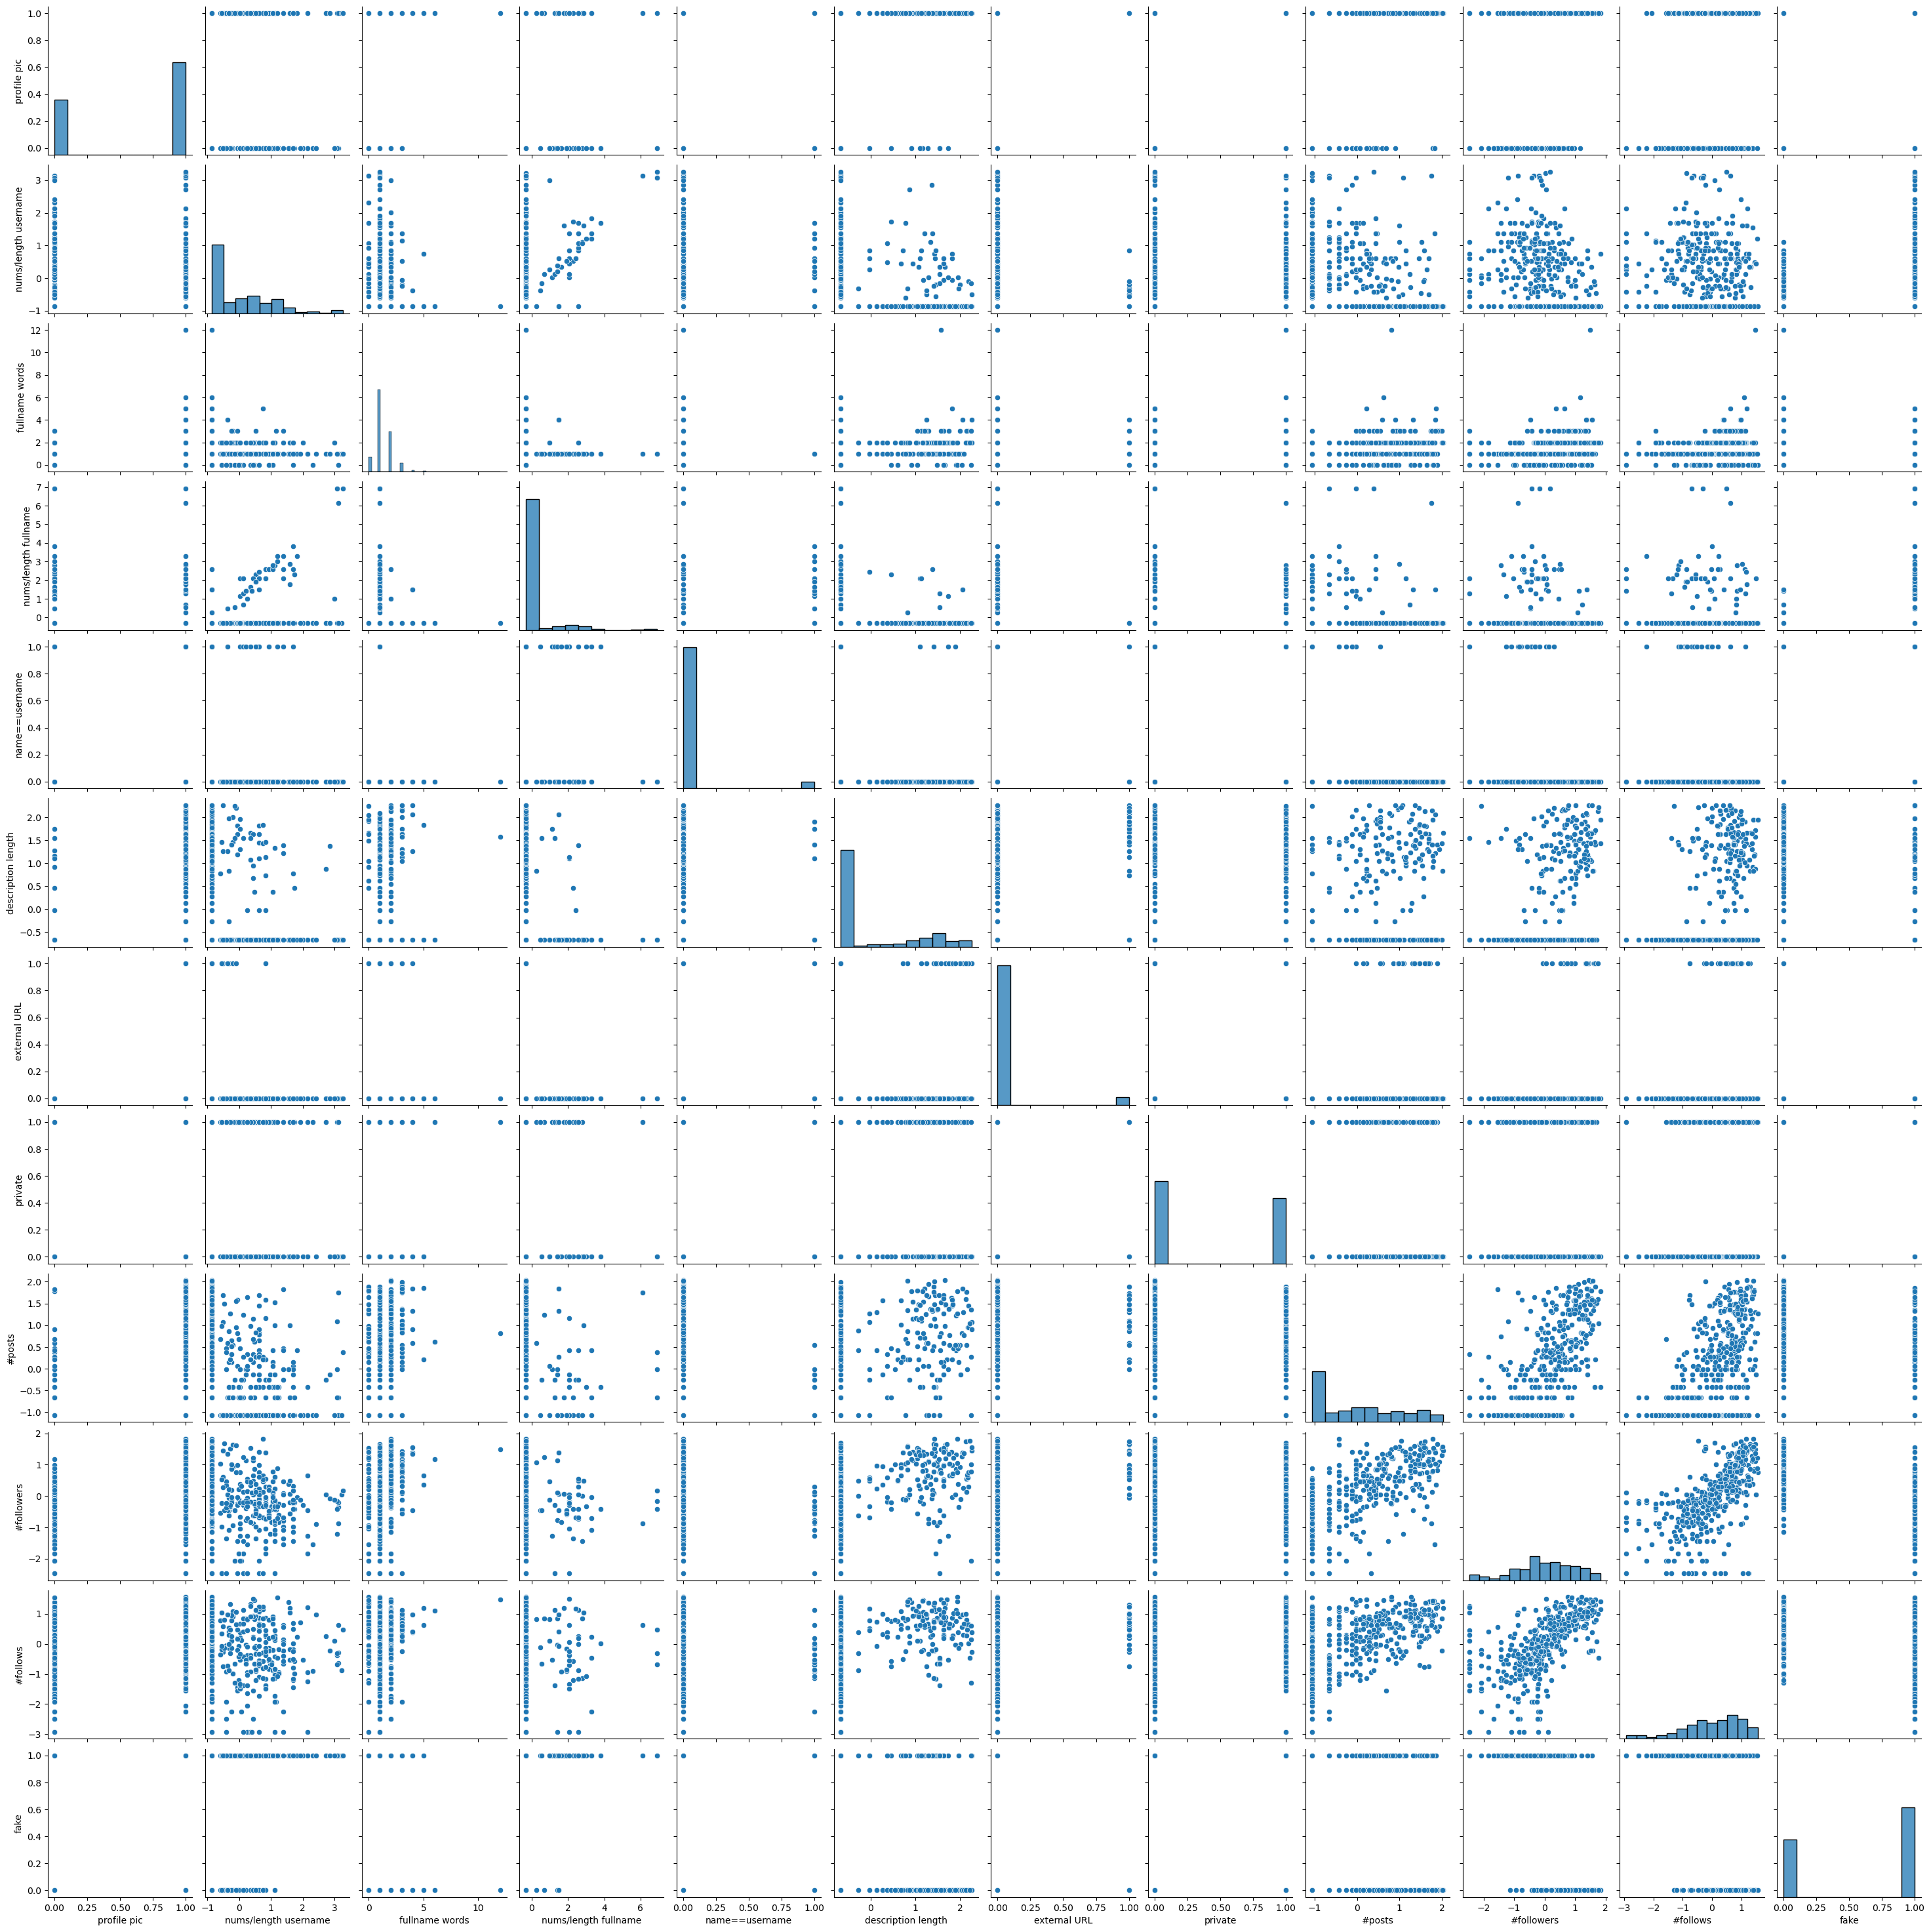

In [44]:
#Plotting relationship of each column with every other column
sns.pairplot(df)
plt.show()

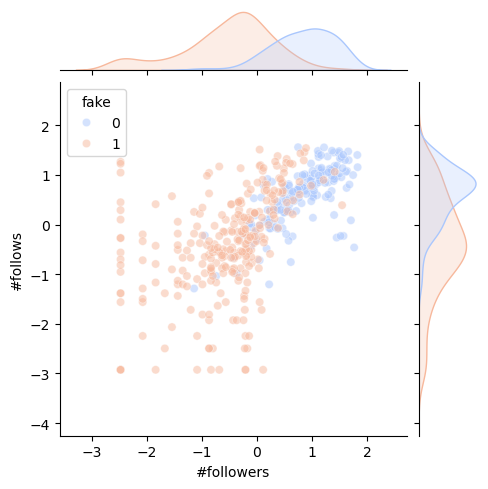

In [45]:
# visualizing joint plot between followers and follows
sns.jointplot(data=df, x="#followers", y="#follows", kind="scatter", 
              alpha=0.5, height=5, hue="fake", palette="coolwarm")  
plt.show()

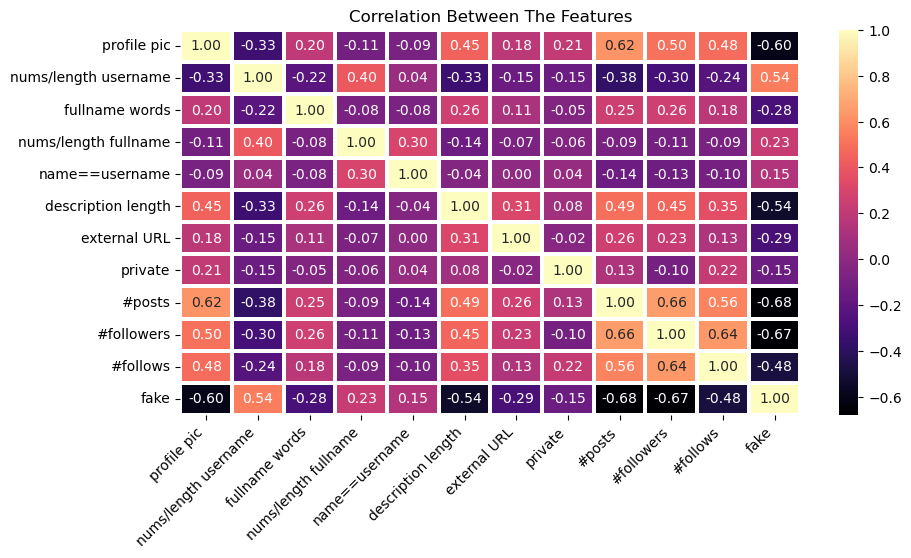

In [46]:
#Plotting Heatmap to visualize correlation between numerical columns in df
plt.figure(figsize=(10, 5))
plt.title('Correlation Between The Features')
# Change the color palette using 'coolwarm', 'viridis', 'magma', 'cividis', etc.
a = sns.heatmap(df.corr(), annot=True, fmt='.2f', linewidths=1.5, cmap="magma")
a.set_xticklabels(a.get_xticklabels(), rotation=45, ha='right', fontsize=10)
a.set_yticklabels(a.get_yticklabels(), fontsize=10) 
plt.show()

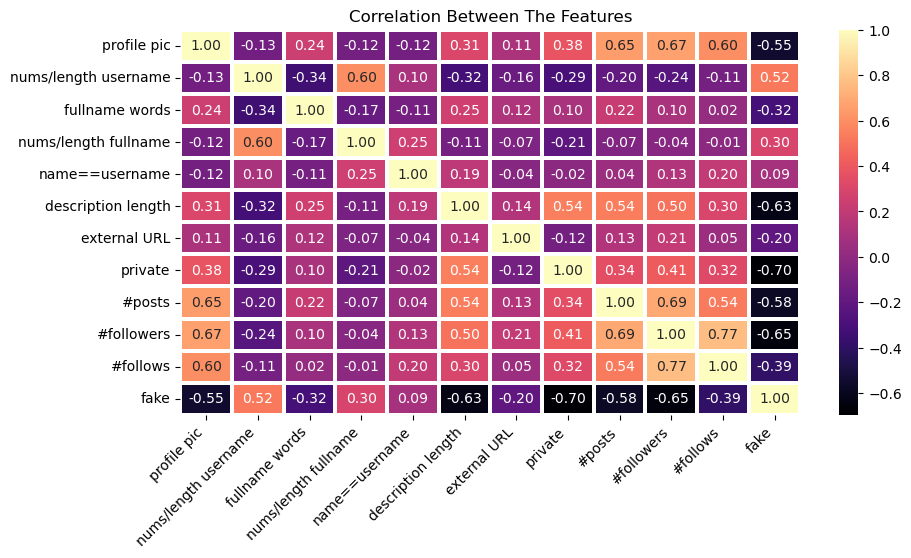

In [47]:
#Plotting Heatmap to visualize correlation between numerical columns in df2
plt.figure(figsize=(10, 5))
plt.title('Correlation Between The Features')
a = sns.heatmap(df2.corr(), annot=True, fmt='.2f', linewidths=1.5, cmap = 'magma')
a.set_xticklabels(a.get_xticklabels(), rotation=45, ha='right', fontsize=10)
a.set_yticklabels(a.get_yticklabels(), fontsize=10) 
plt.show()

# Model Building

### Feature Importance in df

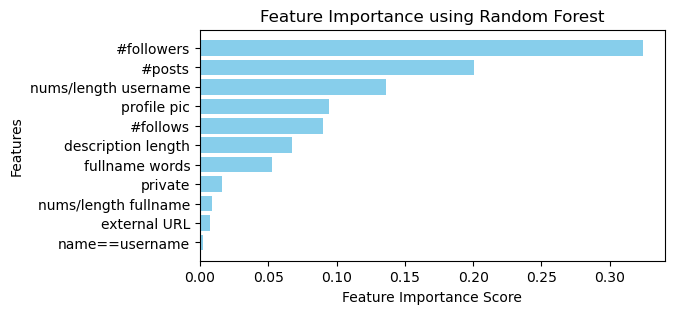

                 Feature  Importance
9             #followers    0.324166
8                 #posts    0.200901
1   nums/length username    0.136444
0            profile pic    0.094455
10              #follows    0.090108
5     description length    0.067209
2         fullname words    0.052414
7                private    0.015904
3   nums/length fullname    0.009057
6           external URL    0.007082
4         name==username    0.002258


In [50]:
X = df.drop(columns=['fake'])  # Drop target variable
y = df['fake']  # Target variable
# Train a RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)
# Get feature importance
importances = rf.feature_importances_
# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# Plot feature importance
plt.figure(figsize=(6, 3))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance using Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()
# Print the sorted feature importance
print(feature_importance_df)

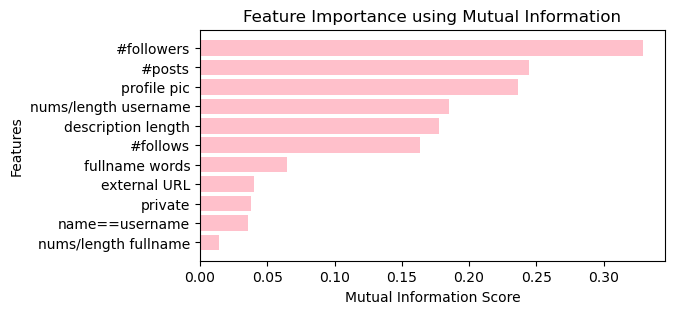

                 Feature  MI Score
9             #followers  0.329011
8                 #posts  0.244366
0            profile pic  0.236183
1   nums/length username  0.185138
5     description length  0.177869
10              #follows  0.163657
2         fullname words  0.065049
6           external URL  0.039872
7                private  0.038180
4         name==username  0.035501
3   nums/length fullname  0.013980


In [51]:
mi_scores = mutual_info_classif(X, y)
# Create DataFrame for visualization
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
mi_df = mi_df.sort_values(by='MI Score', ascending=False)
# Plot the results
plt.figure(figsize=(6, 3))
plt.barh(mi_df['Feature'], mi_df['MI Score'], color='pink')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.title('Feature Importance using Mutual Information')
plt.gca().invert_yaxis()
plt.show()
# Print the sorted feature importance
print(mi_df)

### Feature importance of df2

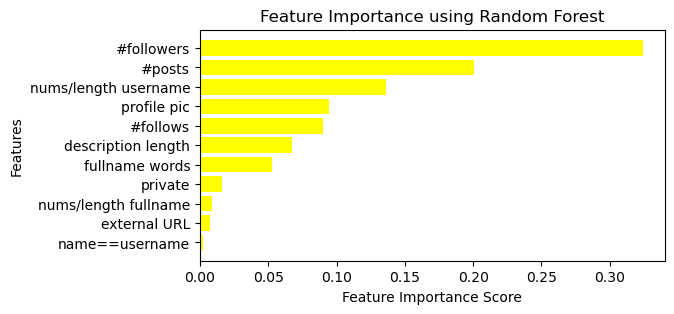

                 Feature  Importance
9             #followers    0.324166
8                 #posts    0.200901
1   nums/length username    0.136444
0            profile pic    0.094455
10              #follows    0.090108
5     description length    0.067209
2         fullname words    0.052414
7                private    0.015904
3   nums/length fullname    0.009057
6           external URL    0.007082
4         name==username    0.002258


In [53]:
X2 = df2.drop(columns=['fake'])  # Drop target variable
y2 = df2['fake']  # Target variable
# Train a RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X2, y2)
# Get feature importance
importances = rf.feature_importances_
# Create a DataFrame to display feature importance
feature_importance_df2 = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance_df2 = feature_importance_df.sort_values(by='Importance', ascending=False)
# Plot feature importance
plt.figure(figsize=(6, 3))
plt.barh(feature_importance_df2['Feature'], feature_importance_df2['Importance'], color='yellow')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance using Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()
# Print the sorted feature importance
print(feature_importance_df2)

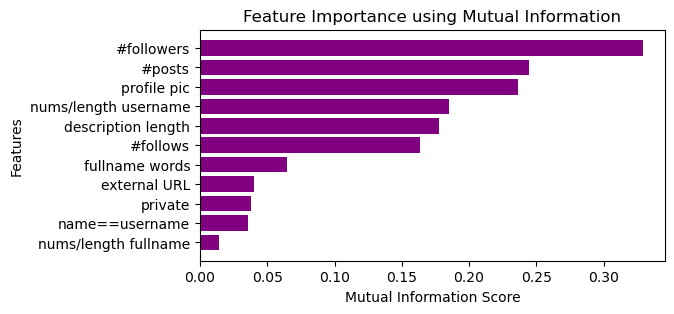

                 Feature  MI Score
9             #followers  0.329011
8                 #posts  0.244366
0            profile pic  0.236183
1   nums/length username  0.185138
5     description length  0.177869
10              #follows  0.163657
2         fullname words  0.065049
6           external URL  0.039872
7                private  0.038180
4         name==username  0.035501
3   nums/length fullname  0.013980


In [54]:
mi_scores = mutual_info_classif(X2, y2)
# Create DataFrame for visualization
mi_df2 = pd.DataFrame({'Feature': X2.columns, 'MI Score': mi_scores})
mi_df2 = mi_df.sort_values(by='MI Score', ascending=False)
# Plot the results
plt.figure(figsize=(6, 3))
plt.barh(mi_df2['Feature'], mi_df2['MI Score'], color='purple')
plt.xlabel('Mutual Information Score')
plt.ylabel('Features')
plt.title('Feature Importance using Mutual Information')
plt.gca().invert_yaxis()
plt.show()
# Print the sorted feature importance
print(mi_df2)

#### Training Machine Model

In [56]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import numpy as np
# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)
}
results = {}
# Cross-validation settings
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models.items():
    print(f"Training {name}...")
    # Train the model
    model.fit(X, y)
    # Predictions
    y_train_pred = model.predict(X)
    y_test_pred = model.predict(X2)
    y_test_proba = model.predict_proba(X2)[:, 1] if hasattr(model, "predict_proba") else None
    # Cross-validation scores
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    # Metrics
    accuracy_train = accuracy_score(y, y_train_pred)
    accuracy_test = accuracy_score(y2, y_test_pred)
    precision = precision_score(y2, y_test_pred)
    recall = recall_score(y2, y_test_pred)
    f1 = f1_score(y2, y_test_pred)
    roc_auc = roc_auc_score(y2, y_test_proba) if y_test_proba is not None else None
    # Store results
    results[name] = {
        "Train Accuracy": accuracy_train,
        "Test Accuracy": accuracy_test,
        "Cross-Validation Mean Accuracy": np.mean(cv_scores),
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc
    }
    # Print results
    print(f"{name} Results:")
    print(f"Train Accuracy: {accuracy_train:.4f}, Test Accuracy: {accuracy_test:.4f}")
    print(f"Cross-Validation Mean Accuracy: {np.mean(cv_scores):.4f}")
    print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}\n")

Training Logistic Regression...
Logistic Regression Results:
Train Accuracy: 0.9369, Test Accuracy: 0.9326
Cross-Validation Mean Accuracy: 0.9256
Precision: 0.8889, Recall: 1.0000, F1-Score: 0.9412, ROC-AUC: 0.9929

Training Random Forest...
Random Forest Results:
Train Accuracy: 1.0000, Test Accuracy: 0.9326
Cross-Validation Mean Accuracy: 0.9143
Precision: 0.9038, Recall: 0.9792, F1-Score: 0.9400, ROC-AUC: 0.9743

Training SVM...
SVM Results:
Train Accuracy: 0.9437, Test Accuracy: 0.9326
Cross-Validation Mean Accuracy: 0.9121
Precision: 0.8889, Recall: 1.0000, F1-Score: 0.9412, ROC-AUC: 0.9853



#### Checking Accuracy

In [58]:
# checking different models accuracy
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True)}
results = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X, y)
    y_pred = model.predict(X2)
    y_pred_proba = model.predict_proba(X2)[:, 1] if hasattr(model, "predict_proba") else None
    accuracy = accuracy_score(y2, y_pred)
    precision = precision_score(y2, y_pred)
    recall = recall_score(y2, y_pred)
    f1 = f1_score(y2, y_pred)
    roc_auc = roc_auc_score(y2, y_pred_proba) if y_pred_proba is not None else None
    results[name] = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1,
        "ROC-AUC": roc_auc    } 
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}, ROC-AUC: {roc_auc:.4f}\n")

Training Logistic Regression...
Logistic Regression Results:
Accuracy: 0.9326, Precision: 0.8889, Recall: 1.0000, F1-Score: 0.9412, ROC-AUC: 0.9929

Training Random Forest...
Random Forest Results:
Accuracy: 0.9101, Precision: 0.8846, Recall: 0.9583, F1-Score: 0.9200, ROC-AUC: 0.9804

Training SVM...
SVM Results:
Accuracy: 0.9326, Precision: 0.8889, Recall: 1.0000, F1-Score: 0.9412, ROC-AUC: 0.9853



In [59]:
#Saving best model
import pickle
best_model_name = max(results, key=lambda k: results[k]["F1-Score"])
best_model = models[best_model_name]
with open("best_model.pkl", "wb") as f:
    pickle.dump(best_model, f)
with open("best_model.pkl", "rb") as f:
    loaded_model = pickle.load(f)
print(f"Best Model Saved: {best_model_name}")

Best Model Saved: Logistic Regression
